In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from implementation import *
from helpers import *

%load_ext autoreload
%autoreload 2

In [2]:
data = load_csv_data("data", sub_sample=True)

In [3]:
len(data)

5

In [4]:
x_train, x_test, y_train, train_ids, test_ids = data

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(train_ids.shape)
print(test_ids.shape)

(6563, 321)
(6563,)
(109379, 321)
(6563,)
(109379,)


In [6]:
#D = 321
#N = 6563
N, D = x_train.shape

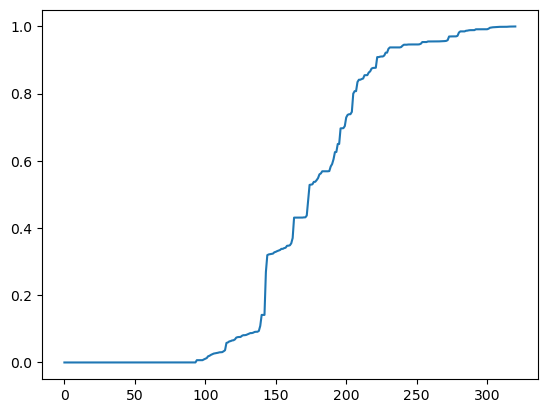

In [8]:
#92 dimension feature have no None.
nan_array = np.isnan(x_train)
sorted_nan = np.sort((nan_array.sum(axis=0)/N ), axis=0)
plt.plot(sorted_nan)

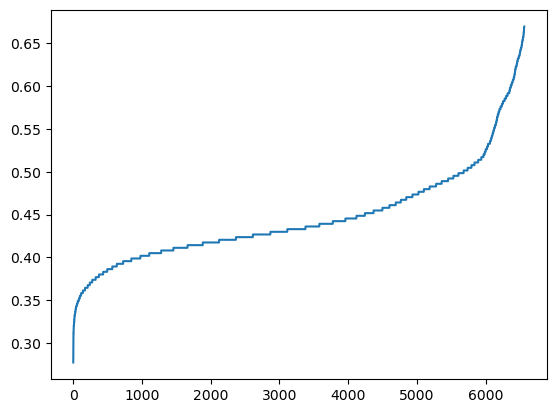

In [9]:
#0 sample has every feature
sorted_nan = np.sort((nan_array.sum(axis=1)/D ), axis=0)
plt.plot(sorted_nan)

In [10]:
#Remove every feature who has at least one nan.
x_train = x_train[:, ~np.isnan(x_train).any(axis=0)]
x_test = x_test[:, ~np.isnan(x_test).any(axis=0)]
x_train.shape

(6563, 92)

In [21]:
#Normaliaztion of feature
x_train, x_test, x_mean, x_std = standardize2(x_train, x_test)

In [22]:
D_prime = x_train.shape[1]
inital_w = np.zeros(D_prime)
print(y_train.shape)
print(x_train.shape)
print(inital_w.shape)

(6563,)
(6563, 92)
(92,)


In [28]:
max_iteration = 50
gamma = 0.01
losses, ws = mean_squared_error_gd(y_train, x_train, inital_w, max_iteration, gamma)

GD iter. 0/49: loss=1.0, w0=0.0012379970489197977, w1=0.0012379977189080676
GD iter. 1/49: loss=0.3676756451849567, w0=0.0013370384164406797, w1=0.001337039138396965
GD iter. 2/49: loss=0.3170888122704255, w0=0.0013449617362315338, w1=0.0013449624607133495
GD iter. 3/49: loss=0.3130417948663781, w0=0.0013455954847443774, w1=0.0013455962077962551
GD iter. 4/49: loss=0.31271802780498315, w0=0.0013456460573581027, w1=0.0013456467786635991
GD iter. 5/49: loss=0.3126921259792366, w0=0.001345649975084204, w1=0.0013456506946180028
GD iter. 6/49: loss=0.31269005378900816, w0=0.001345650160354108, w1=0.0013456508781141835
GD iter. 7/49: loss=0.3126898880029551, w0=0.001345650047022371, w1=0.0013456507630085607
GD iter. 8/49: loss=0.31268987473190274, w0=0.0013456499098021607, w1=0.0013456506240144513
GD iter. 9/49: loss=0.31268987366226375, w0=0.0013456497706709146, w1=0.0013456504831093048
GD iter. 10/49: loss=0.31268987356875505, w0=0.0013456496313868588, w1=0.001345650342051348
GD iter. 11/4

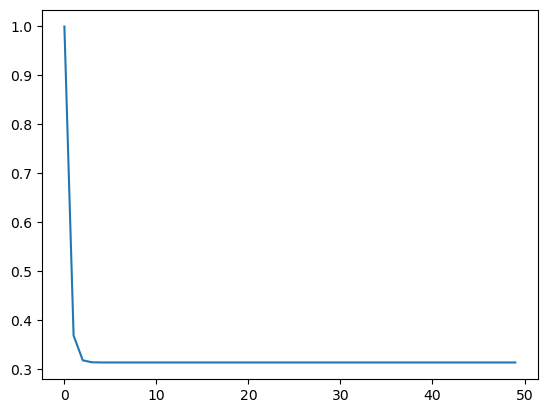

In [29]:
plt.plot(losses)

In [34]:
losses, ws = mean_squared_error_sgd(y_train, x_train, inital_w, max_iteration, gamma)

SGD iter. 0/49: loss=1.0, w0=0.001493287353524379, w1=0.0014932876598143614
SGD iter. 1/49: loss=0.23729694113008287, w0=0.0016127394746826892, w1=0.0016127398517532616
SGD iter. 2/49: loss=0.17628321176196657, w0=0.0016223260757606674, w1=0.0016223264639737256
SGD iter. 3/49: loss=0.17138669933947262, w0=-0.0013635041945820753, w1=-0.0013635049631760595
SGD iter. 4/49: loss=1.6964717076210483, w0=0.001384292161568852, w1=0.0013842937100140666
SGD iter. 5/49: loss=0.29298747907590683, w0=0.00160407419872258, w1=0.001604076007628829
SGD iter. 6/49: loss=0.18072814959885852, w0=0.0016216466173484554, w1=0.001621648443475263
SGD iter. 7/49: loss=0.17175258099878093, w0=0.0016230881071415085, w1=0.001623089934549535
SGD iter. 8/49: loss=0.17101632719083323, w0=0.0016231677726945997, w1=0.0016231696001625408
SGD iter. 9/49: loss=0.17097571964642172, w0=0.001623205292422745, w1=0.0016232071199171936
SGD iter. 10/49: loss=0.17096847352332684, w0=-0.0013633397077631706, w1=-0.00136333862897015

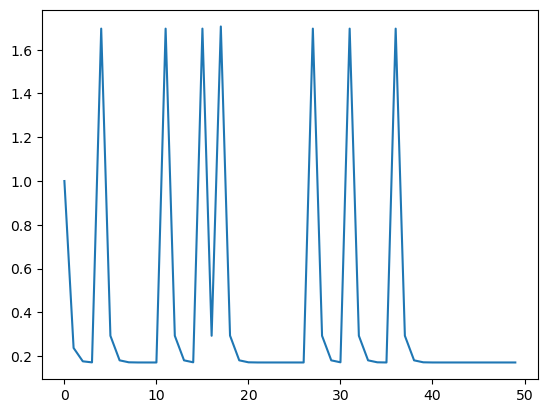

In [35]:
# I think it goes up when we have an outlier / error in the dataset. If we increase the batch size it should be better
plt.plot(losses)